In [1]:
!pip install shap
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import shap
import transformers
import nlp
import torch
from pathlib import Path
import numpy as np
import scipy as sp

# project_dir = Path.cwd()
# print(project_dir)

from transformers import AutoModelForSequenceClassification
# load a BERT sentiment analysis model
tokenizer = transformers.AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert").cuda()
# cl_path = '/content/drive/MyDrive/finBERT/models/classifier_model/finbert-sentiment'
# model = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

# build an explainer using a token masker


In [ ]:
pip install datasets

In [79]:
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

df=pd.read_csv("dataSpecial.csv", encoding="latin", header=[0])
df

,Description,Semantic
0,Finnish Talentum reports its operating profit ...,positive
1,"Lifetree was founded in 2000 , and its revenue...",positive
2,Nokia also noted the average selling price of ...,positive
3,Calls to the switchboard and directory service...,negative
4,"Earnings per share EPS are seen at EUR 0.56 , ...",positive
5,The growth of net sales has continued favourab...,positive
6,The company slipped to an operating loss of EU...,negative
7,The company 's profit before taxes fell to EUR...,negative
8,Unit costs for flight operations fell by 6.4 p...,negative
9,"Tiimari , the Finnish retailer , reported to h...",positive


In [80]:
desc=df['Description']
print(type(desc))

df2 = desc.to_frame(name="Desc")
print(type(df2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [81]:
dataset = ds.dataset(pa.Table.from_pandas(df2).to_batches())

### convert to Huggingface dataset
data = Dataset(pa.Table.from_pandas(df2))

In [82]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][0:10], fixed_context=1)

Partition explainer: 11it [00:14,  4.75s/it]


In [160]:
print(data[8:9])

{'Desc': ['Unit costs for flight operations fell by 6.4 percent .']}


In [161]:
shap.plots.text(shap_values[8:9])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


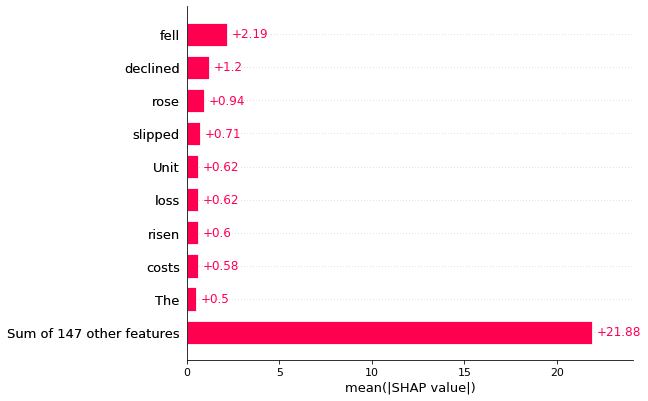

In [101]:
shap.plots.bar(shap_values)

In [162]:
print(desc[8])

Unit costs for flight operations fell by 6.4 percent .


In [163]:
sent1=desc[8].replace("fell by 6.4 percent", "stayed the same")
desc[8]=sent1


In [164]:
df3 = desc.to_frame(name="Desc")


In [165]:
dataset = ds.dataset(pa.Table.from_pandas(df3).to_batches())

### convert to Huggingface dataset
data = Dataset(pa.Table.from_pandas(df3))

In [166]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:14,  4.74s/it]


In [167]:
print(data[8:9])

{'Desc': ['Unit costs for flight operations stayed the same .']}


In [168]:
shap.plots.text(shap_values[8:9])


In [172]:
sent2=desc[8].replace("got up", "got up by 6.4 percent")
desc[8]=sent2
print(sent2)

Unit costs for flight operations got up by 6.4 percent .


In [173]:
df4 = desc.to_frame(name="Desc")


In [174]:
dataset = ds.dataset(pa.Table.from_pandas(df4).to_batches())

### convert to Huggingface dataset
data = Dataset(pa.Table.from_pandas(df4))

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

In [ ]:
shap.plots.text(shap_values[8:9])